In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Load and preprocess data
twitter_data = pd.read_csv('twitter_data.csv', header=0)
company_data = pd.read_csv('data2.csv', header=0)

# Merge datasets based on a common identifier (e.g., company name)
#merged_data = pd.merge(company_data, tweet_data, on='common_identifier', how='inner')

# Feature Engineering
# Assuming 'exit_date' is in datetime format
#merged_data['exit_date'] = pd.to_datetime(merged_data['exit_date'], errors='coerce')
#merged_data['formatted_date'] = pd.to_datetime(merged_data['formatted_date'], errors='coerce')

# Assuming 'exit_date' and 'tweet_date' are in datetime format

funding_status_mapping = {'M&A': 0, 'IPO': 1, 'Closed': 2}
company_data['funding_status'] = company_data['funding_status'].map(funding_status_mapping)

company_data['exit_date'] = pd.to_datetime(company_data['exit_date'])
twitter_data['formatted_date'] = pd.to_datetime(twitter_data['formatted_date'])
company_data = company_data.dropna(subset=['funding_status'])


# Create a binary column for 'has_facebook'
company_data['has_facebook'] = company_data['has_facebook'].apply(lambda x: 1 if pd.notna(x) else 0)
company_data['has_twitter'] = company_data['has_twitter'].apply(lambda x: 1 if pd.notna(x) else 0)
company_data['has_website'] = company_data['has_website'].apply(lambda x: 1 if pd.notna(x) else 0)
company_data['has_linkedin'] = company_data['has_linkedin'].apply(lambda x: 1 if pd.notna(x) else 0)

# Handle missing values for 'number_of_employees' by replacing them with the mean
#company_data['number_of_employees'].fillna(company_data['number_of_employees'].mean(), inplace=True)
company_data['number_of_founders'].fillna(1, inplace=True)
company_data['number_of_articles'].fillna(0, inplace=True)
company_data['number_of_lead_investments'].fillna(0, inplace=True)
company_data['number_of_investments'].fillna(0, inplace=True)
company_data['number_of_funding_rounds'].fillna(0, inplace=True)
company_data['last_funding'].fillna(0, inplace=True)
company_data['last_funding_amount'].fillna(0, inplace=True)
company_data['last_equity'].fillna(0, inplace=True)
company_data['total_equity'].fillna(0, inplace=True)
company_data['total_funding_amount'].fillna(0, inplace=True)
company_data['number_lead_investor'].fillna(0, inplace=True)
company_data['number_investor'].fillna(0, inplace=True)
company_data['monthly_visit'].fillna(company_data['monthly_visit'].mean(), inplace=True)
company_data['average_visit'].fillna(company_data['average_visit'].mean(), inplace=True)

# Handle categorical features
company_data['acq_status'].fillna('Unknown', inplace=True)
company_data['location'].fillna('Unknown', inplace=True)
company_data['revenue'].fillna('Unknown', inplace=True)
company_data['last_funding_type'].fillna('Unknown', inplace=True)
company_data['last_equity_type'].fillna('Unknown', inplace=True)
company_data['number_of_employees'].fillna('Unknown', inplace=True)

# Handle lists of industries
company_data['industry_groups'] = company_data['industry_groups'].apply(lambda x: x.split(',') if pd.notnull(x) else [])

# Convert date columns to datetime format

company_data['A'] = 0

# Lặp qua từng dòng trong bảng 'company'
for index, company_row in company_data.iterrows():
    # Lấy ngày thoát từ dòng hiện tại
    exit_date = company_row['exit_date']

    # Lọc các dòng trong bảng 'twitter' có 'tweet_date' nằm trong khoảng trước và sau 15 ngày so với 'exit_date'
    filtered_tweets = twitter_data[
        (twitter_data['formatted_date'] >= exit_date - pd.Timedelta(days=15)) &
        (twitter_data['formatted_date'] <= exit_date + pd.Timedelta(days=15))
    ]

    # Tính tổng số 'angry' và gán vào cột 'angry' tương ứng trong bảng 'company'
    company_data.at[index, 'A'] = filtered_tweets['A'].sum()
company_data['H'] = 0

# Lặp qua từng dòng trong bảng 'company'
for index, company_row in company_data.iterrows():
    # Lấy ngày thoát từ dòng hiện tại
    exit_date = company_row['exit_date']

    # Lọc các dòng trong bảng 'twitter' có 'tweet_date' nằm trong khoảng trước và sau 15 ngày so với 'exit_date'
    filtered_tweets = twitter_data[
        (twitter_data['formatted_date'] >= exit_date - pd.Timedelta(days=15)) &
        (twitter_data['formatted_date'] <= exit_date + pd.Timedelta(days=15))
    ]

    # Tính tổng số 'angry' và gán vào cột 'angry' tương ứng trong bảng 'company'
    company_data.at[index, 'H'] = filtered_tweets['H'].sum()

company_data['F'] = 0

# Lặp qua từng dòng trong bảng 'company'
for index, company_row in company_data.iterrows():
    # Lấy ngày thoát từ dòng hiện tại
    exit_date = company_row['exit_date']

    # Lọc các dòng trong bảng 'twitter' có 'tweet_date' nằm trong khoảng trước và sau 15 ngày so với 'exit_date'
    filtered_tweets = twitter_data[
        (twitter_data['formatted_date'] >= exit_date - pd.Timedelta(days=15)) &
        (twitter_data['formatted_date'] <= exit_date + pd.Timedelta(days=15))
    ]

    # Tính tổng số 'angry' và gán vào cột 'angry' tương ứng trong bảng 'company'
    company_data.at[index, 'F'] = filtered_tweets['F'].sum()

company_data['S'] = 0

# Lặp qua từng dòng trong bảng 'company'
for index, company_row in company_data.iterrows():
    # Lấy ngày thoát từ dòng hiện tại
    exit_date = company_row['exit_date']

    # Lọc các dòng trong bảng 'twitter' có 'tweet_date' nằm trong khoảng trước và sau 15 ngày so với 'exit_date'
    filtered_tweets = twitter_data[
        (twitter_data['formatted_date'] >= exit_date - pd.Timedelta(days=15)) &
        (twitter_data['formatted_date'] <= exit_date + pd.Timedelta(days=15))
    ]

    # Tính tổng số 'angry' và gán vào cột 'angry' tương ứng trong bảng 'company'
    company_data.at[index, 'S'] = filtered_tweets['S'].sum()



# Handle categorical values
label_encoder = LabelEncoder()
categorical_columns = ['number_of_employees','acq_status', 'location', 'revenue', 'last_funding_type', 'last_equity_type']
for column in categorical_columns:
    company_data[column] = label_encoder.fit_transform(company_data[column])



# Handle missing values for 'number_of_employees'
#most_frequent_category = features['number_of_employees'].mode()[0]
#features['number_of_employees'].fillna(most_frequent_category, inplace=True)

# Encode categorical variable using LabelEncoder
#label_encoder = LabelEncoder()
#features['number_of_employees'] = label_encoder.fit_transform(features['number_of_employees'])

label_encoder_funding = LabelEncoder()

# Step 2: Train-Test Split
features = company_data[['last_funding','found_day','last_funding','last_equity_type','last_funding_type','revenue','location','acq_status','average_visit','monthly_visit','number_investor','number_lead_investor','total_funding_amount','total_equity','last_equity','last_funding_amount','number_of_funding_rounds','number_of_investments','number_of_lead_investments','number_of_articles','number_of_founders','number_of_funding_rounds','has_twitter','has_website', 'has_linkedin','number_of_employees','number_of_founders','has_facebook']]
target = company_data['funding_status']

target = label_encoder_funding.fit_transform(company_data['funding_status'])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Unique classes in target variable:", set(y_train))



<ipython-input-1-2cd6ca4e67ca>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['has_facebook'] = company_data['has_facebook'].apply(lambda x: 1 if pd.notna(x) else 0)
<ipython-input-1-2cd6ca4e67ca>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['has_twitter'] = company_data['has_twitter'].apply(lambda x: 1 if pd.notna(x) else 0)
<ipython-input-1-2cd6ca4e67ca>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

Unique classes in target variable: {0, 1, 2}


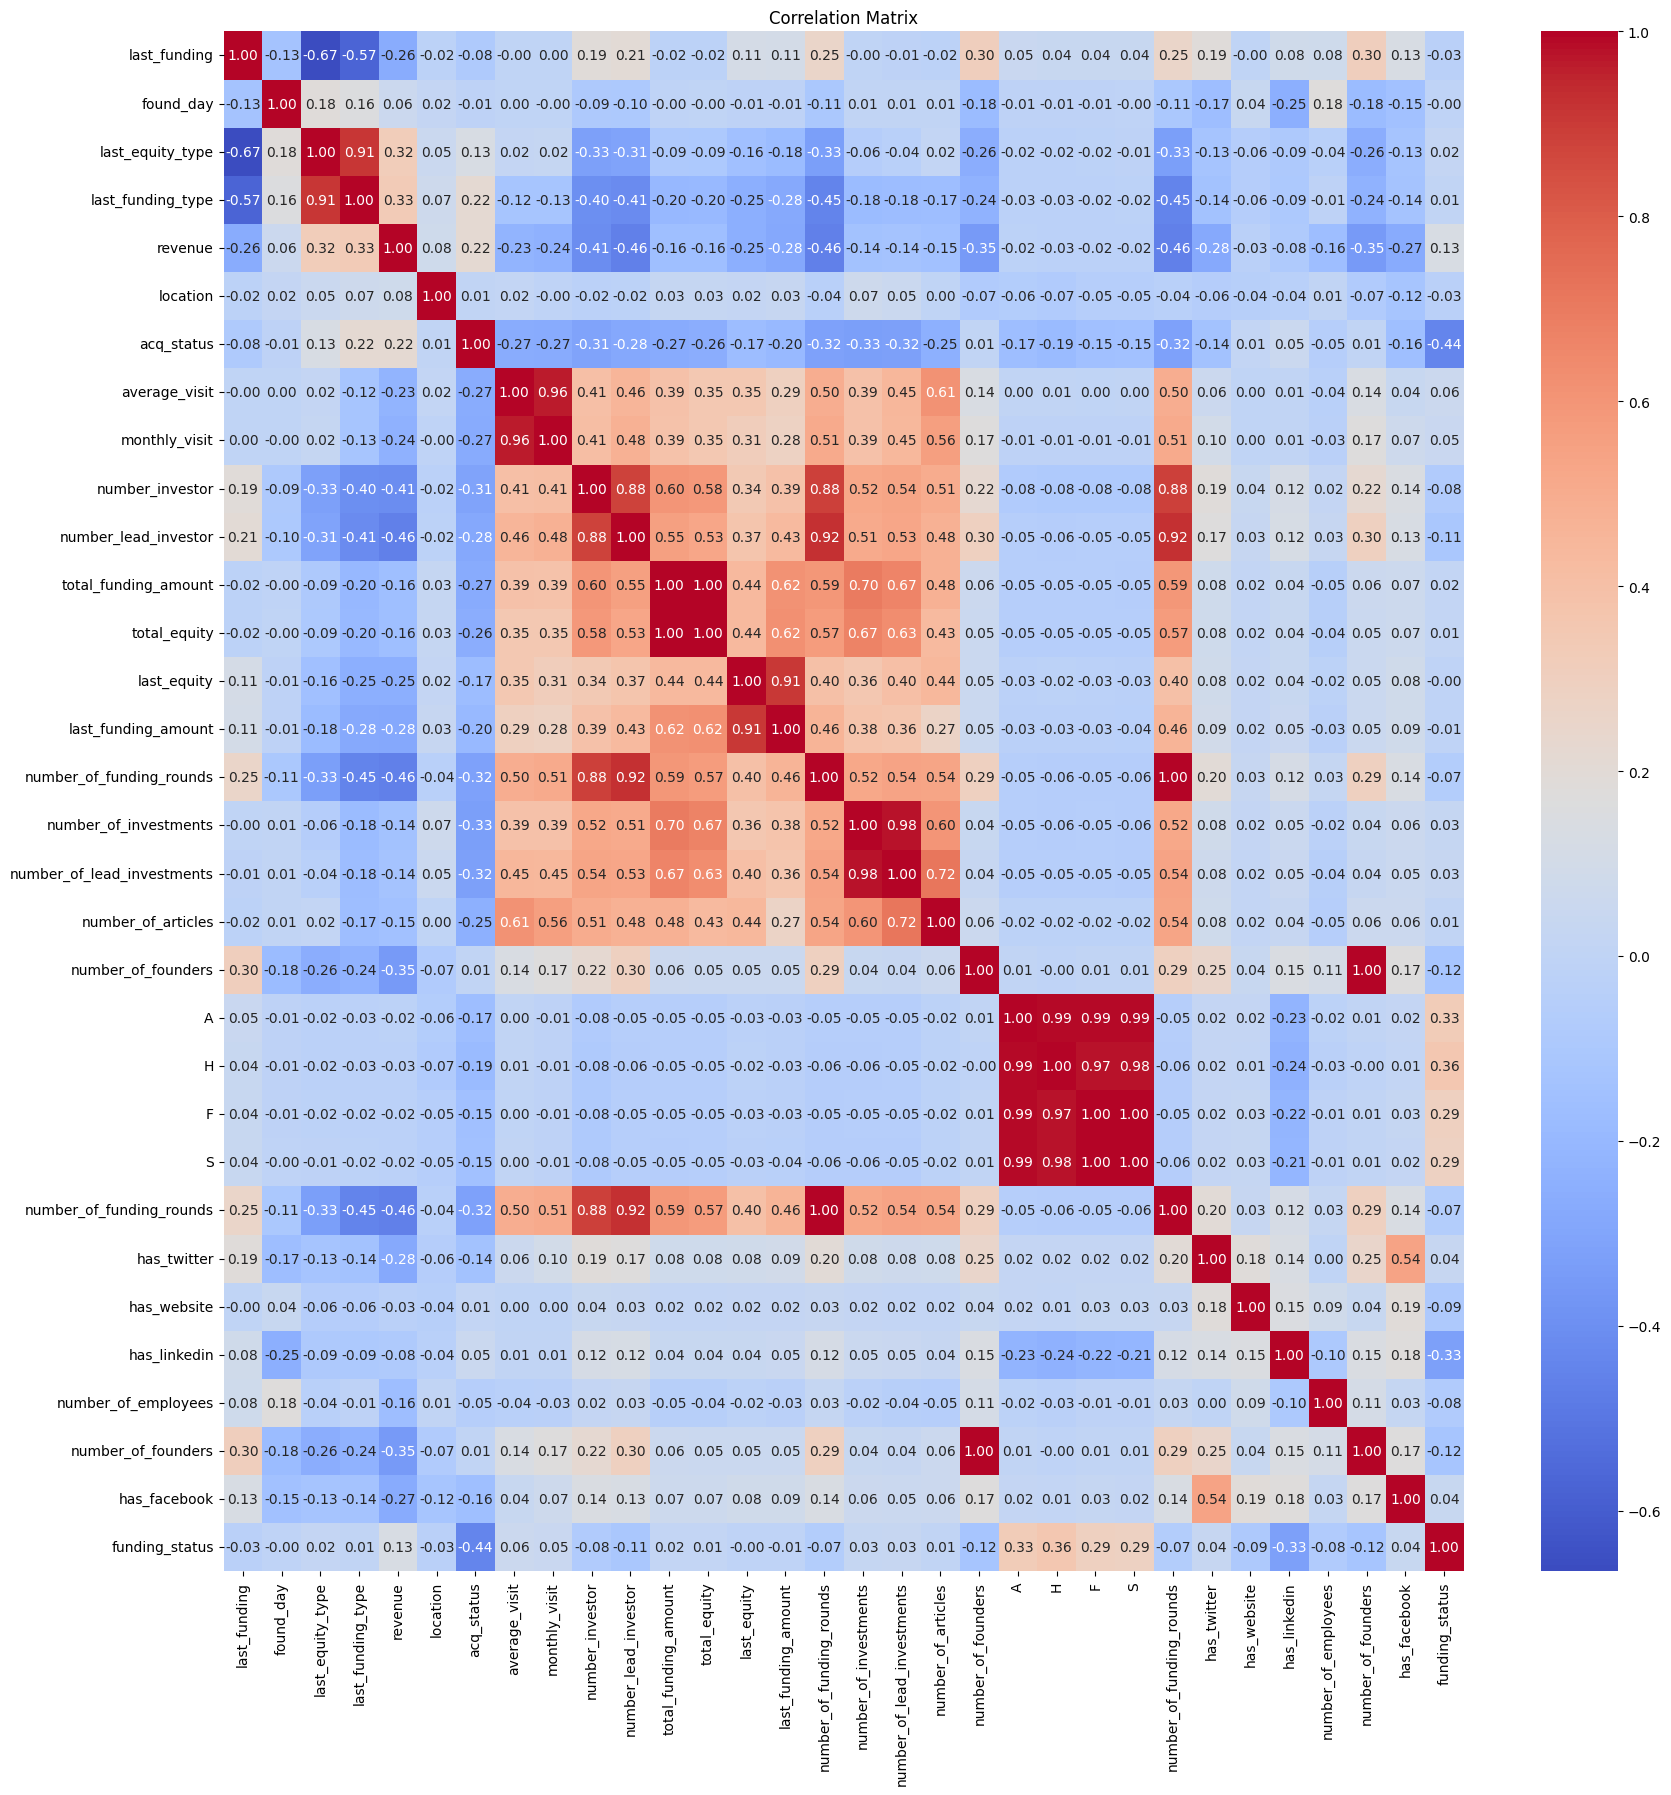

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Assuming you have a DataFrame named 'df' with columns: funding_status, Happy, Sadness, Fear, Anger
# Adjust column names accordingly based on your actual dataset
selected_data = company_data[['last_funding','found_day','last_equity_type','last_funding_type','revenue','location','acq_status','average_visit','monthly_visit','number_investor','number_lead_investor','total_funding_amount','total_equity','last_equity','last_funding_amount','number_of_funding_rounds','number_of_investments','number_of_lead_investments','number_of_articles','number_of_founders','A', 'H','F','S','number_of_funding_rounds','has_twitter','has_website', 'has_linkedin','number_of_employees','number_of_founders','has_facebook', 'funding_status']]


# Display the correlation matrix
correlation_matrix = selected_data.corr()

# Export the correlation matrix as a CSV file
correlation_matrix.to_csv('correlation_matrix2.csv', index=True)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('correlation_heatmap2.png')
plt.show()


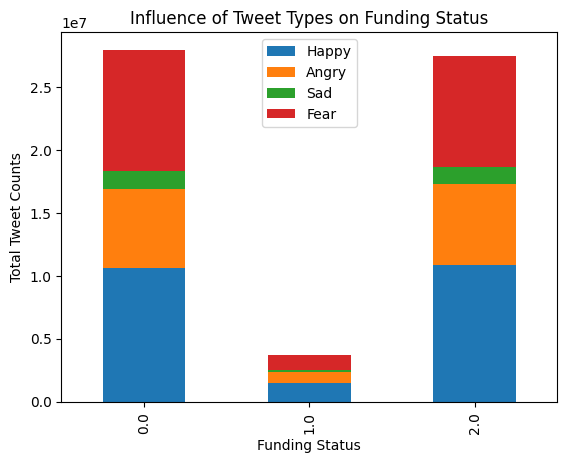

Data Table: Total Tweet Counts for Each Type with Different Funding Status
                       H        A        S        F
funding_status                                     
0.0             10618515  6273332  1462900  9604890
1.0              1473729   854845   179864  1237014
2.0             10863845  6453821  1328215  8823242


In [ ]:
grouped_data = company_data.groupby('funding_status').agg({'H': 'sum', 'A': 'sum', 'S': 'sum', 'F': 'sum'})

grouped_data.plot(kind='bar', stacked=True)
plt.title('Influence of Tweet Types on Funding Status')
plt.xlabel('Funding Status')
plt.ylabel('Total Tweet Counts')
plt.legend(['Happy', 'Angry', 'Sad', 'Fear'])
plt.show()

# Display the data table
print("Data Table: Total Tweet Counts for Each Type with Different Funding Status")
print(grouped_data)
grouped_data.to_csv('grouped_data.csv', index=True)

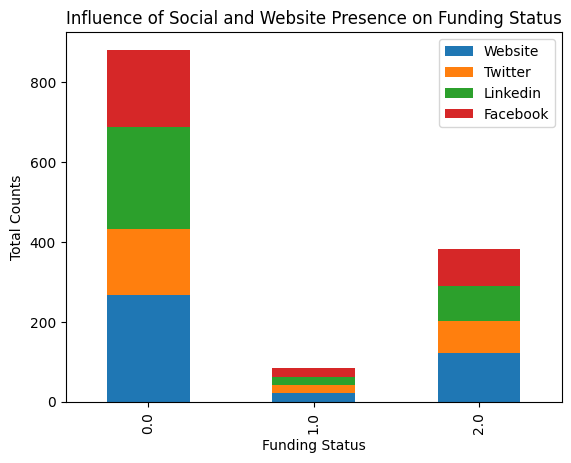

Data Table: Total Counts for Each Channel with Different Funding Status
                has_website  has_twitter  has_linkedin  has_facebook
funding_status                                                      
0.0                     268          166           255           193
1.0                      23           18            22            21
2.0                     121           81            87            94


<Figure size 1000x600 with 0 Axes>

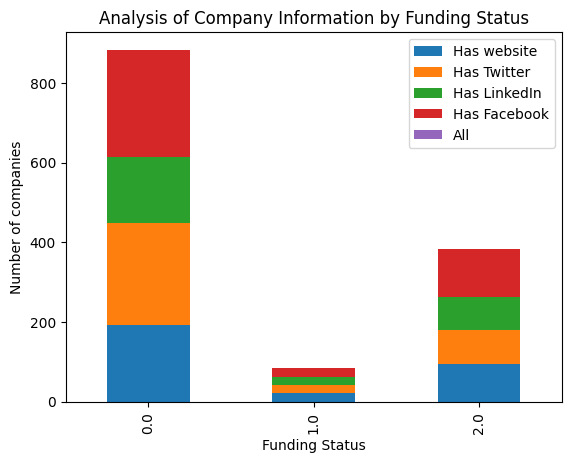

Distribution of Each Channel with Different Funding Status
                has_facebook  has_linkedin  has_twitter  has_website  \
funding_status                                                         
0.0                      193           255          166          268   
1.0                       21            22           18           23   
2.0                       94            87           81          121   

                all_info_available  
funding_status                      
0.0                              1  
1.0                              1  
2.0                              1  


In [ ]:
grouped_data = company_data.groupby('funding_status').agg({'has_website': 'sum', 'has_twitter': 'sum', 'has_linkedin': 'sum', 'has_facebook': 'sum'})

grouped_data.plot(kind='bar', stacked=True)
plt.title('Influence of Social and Website Presence on Funding Status')
plt.xlabel('Funding Status')
plt.ylabel('Total Counts')
plt.legend(['Website', 'Twitter', 'Linkedin', 'Facebook'])
plt.show()

# Display the data table
print("Data Table: Total Counts for Each Channel with Different Funding Status")
print(grouped_data)
grouped_data.to_csv('grouped_data1.csv', index=True)

# Tạo bảng phân tích
analysis_table = pd.pivot_table(company_data, values=['has_website', 'has_twitter', 'has_linkedin', 'has_facebook'],
                                index='funding_status', aggfunc='sum')

# Tính cột 'all_info_available'
analysis_table['all_info_available'] = analysis_table.apply(lambda row: 1 if row.sum() >= 2 else 0, axis=1)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
analysis_table.plot(kind='bar', stacked=True)
plt.title('Analysis of Company Information by Funding Status')
plt.xlabel('Funding Status')
plt.ylabel('Number of companies')
plt.legend(["Has website", "Has Twitter", "Has LinkedIn", "Has Facebook", "All"])
plt.show()

# Hiển thị bảng phân tích
print("Distribution of Each Channel with Different Funding Status")
print(analysis_table)
analysis_table.to_csv('grouped_data1.csv', index=True)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Final Test Accuracy: 85.71%
Final Test Precision: 0.8649
Final Test Recall: 0.8571
Final Test F1 Score: 0.8488


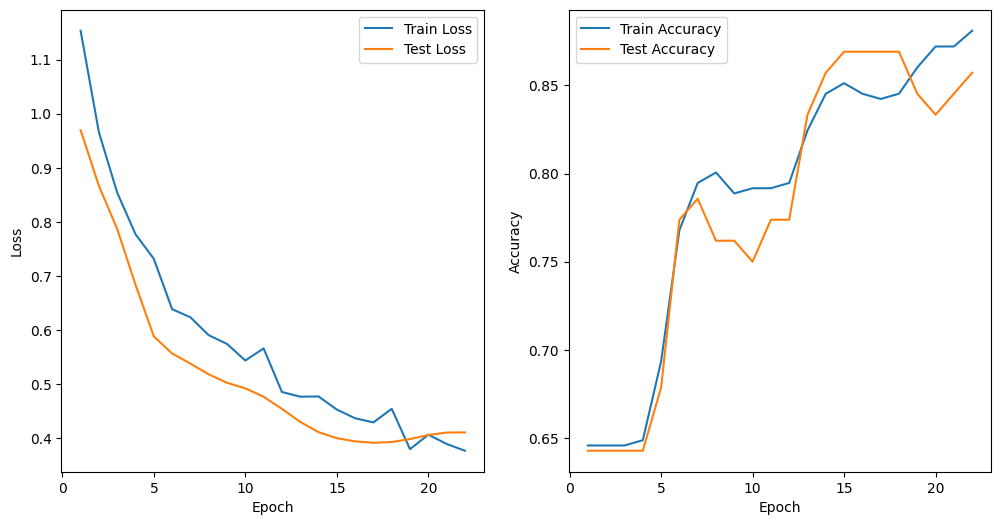

Final Test Accuracy: 85.71%


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # No need for .values here
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)  # No need for .values here

# Define the Swin Transformer model
class SwinTransformerModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SwinTransformerModel, self).__init__()
        # Increase model complexity by adding more layers
        self.fc1 = nn.Linear(input_size, 128)  # Increased units
        self.fc2 = nn.Linear(128, 64)  # Increased units
        self.fc3 = nn.Linear(64, num_classes)

        # Dropout layer for regularization
        self.dropout = nn.Dropout(0.5)  # Adjust dropout rate

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)  # Apply dropout
        x = self.fc3(x)
        return x

# Instantiate the model
input_size = X_train.shape[1]
num_classes = len(set(target))
model = SwinTransformerModel(input_size, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Learning rate scheduling
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.8)  # Adjust scheduler parameters



# Training loop
epochs = 22
train_losses = []  # To store training losses
train_accuracies = []  # To store training accuracies
test_losses = []  # To store test losses
test_accuracies = []  # To store test accuracies

test_precisions = []  # To store test precisions
test_recalls = []  # To store test recalls
test_f1_scores = []  # To store test F1 scores

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    scheduler.step()

    # Evaluate the model on the training set
    with torch.no_grad():
        model.eval()
        train_output = model(X_train_tensor)
        _, train_predicted_labels = torch.max(train_output, 1)
        train_accuracy = (train_predicted_labels == y_train_tensor).sum().item() / len(y_train_tensor)
        train_losses.append(loss.item())
        train_accuracies.append(train_accuracy)

    # Evaluate the model on the test set
    with torch.no_grad():
        model.eval()
        test_output = model(X_test_tensor)
        test_loss = criterion(test_output, y_test_tensor)
        _, test_predicted_labels = torch.max(test_output, 1)
        test_accuracy = accuracy_score(y_test_tensor, test_predicted_labels)
        test_precision = precision_score(y_test_tensor, test_predicted_labels, average='weighted')
        test_recall = recall_score(y_test_tensor, test_predicted_labels, average='weighted')
        test_f1 = f1_score(y_test_tensor, test_predicted_labels, average='weighted')
        test_losses.append(test_loss.item())
        test_accuracies.append(test_accuracy)
        test_precisions.append(test_precision)
        test_recalls.append(test_recall)
        test_f1_scores.append(test_f1)

# ... (phần mã vẽ biểu đồ và in độ chính xác cuối cùng)

# Print final metrics
print(f'Final Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Final Test Precision: {test_precision:.4f}')
print(f'Final Test Recall: {test_recall:.4f}')
print(f'Final Test F1 Score: {test_f1:.4f}')

# Plot and save the charts for all epochs
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Save the combined chart
plt.savefig('all_epochs_charts.png')
plt.show()

# Print final accuracy
print(f'Final Test Accuracy: {test_accuracy * 100:.2f}%')


In [ ]:
results_df = pd.DataFrame({
    'Epoch': range(1, epochs + 1),
    'Train Loss': train_losses,
    'Train Accuracy': train_accuracies,
    'Test Loss': test_losses,
    'Test Accuracy': test_accuracies
})

# Print and display the DataFrame
print("Results DataFrame:")
print(results_df)

# Save the DataFrame to CSV
results_df.to_csv('training_results.csv', index=False)

Results DataFrame:
    Epoch  Train Loss  Train Accuracy  Test Loss  Test Accuracy
0       1    1.081380        0.645833   0.926640       0.642857
1       2    0.909300        0.645833   0.810534       0.642857
2       3    0.809976        0.684524   0.694268       0.690476
3       4    0.715481        0.732143   0.588123       0.726190
4       5    0.650576        0.747024   0.545379       0.726190
5       6    0.635096        0.750000   0.532744       0.761905
6       7    0.602478        0.755952   0.522974       0.797619
7       8    0.569703        0.773810   0.504649       0.797619
8       9    0.505343        0.800595   0.492786       0.785714
9      10    0.550432        0.806548   0.484201       0.773810
10     11    0.499365        0.818452   0.471165       0.809524
11     12    0.480110        0.821429   0.453709       0.845238
12     13    0.477936        0.842262   0.431107       0.833333
13     14    0.443876        0.860119   0.412181       0.857143
14     15    0.448591

Accuracy: 88.10%
Confusion Matrix:
Predicted   0  1   2
Actual              
0          52  1   1
1           0  3   1
2           7  0  19
Accuracy: 88.10%
Confusion Matrix:
[[52  1  1]
 [ 0  3  1]
 [ 7  0 19]]


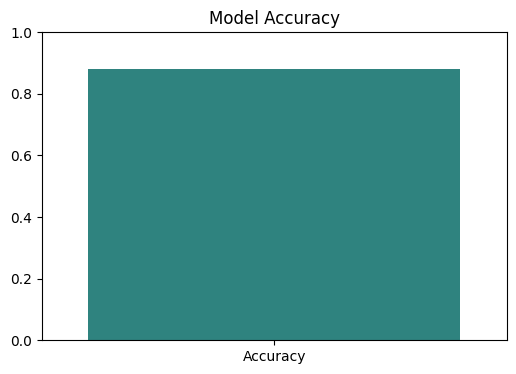

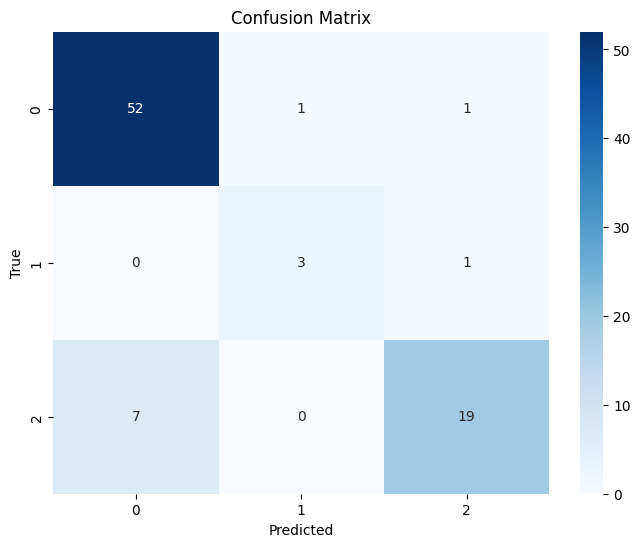

In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

with torch.no_grad():
    model.eval()
    test_output = model(X_test_tensor)
    _, predicted_labels = torch.max(test_output, 1)

# Calculate accuracy
accuracy = (predicted_labels == y_test_tensor).sum().item() / len(y_test_tensor)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print confusion matrix
conf_matrix = pd.crosstab(y_test, predicted_labels.numpy(), rownames=['Actual'], colnames=['Predicted'])
print('Confusion Matrix:')
print(conf_matrix)
predicted_labels_np = predicted_labels.numpy()

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels_np)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels_np)
print('Confusion Matrix:')
print(conf_matrix)

# Visualize accuracy rate
plt.figure(figsize=(6, 4))
sns.barplot(x=['Accuracy'], y=[accuracy], palette='viridis')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.show()

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


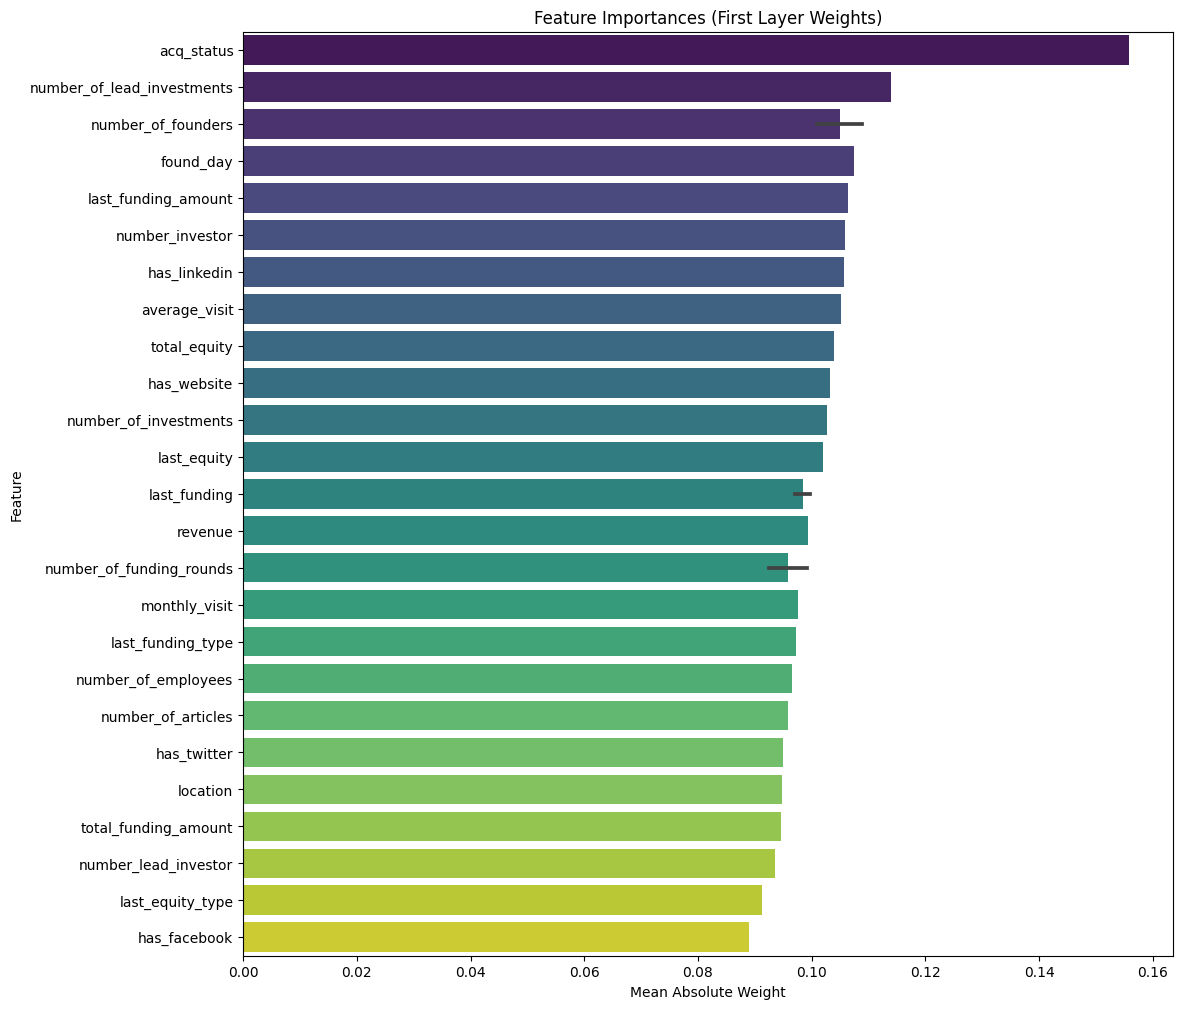

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Ensure NumPy is imported

# Get the weights of the first layer
weights_fc1 = model.fc1.weight.data.numpy()

# Calculate the mean absolute value of the weights along each feature
feature_importances = np.mean(np.abs(weights_fc1), axis=0)

# Get feature names
feature_names = list(features.columns)

# Sort features based on importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the feature importances
plt.figure(figsize=(12, 12))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names, palette='viridis')
plt.title('Feature Importances (First Layer Weights)')
plt.xlabel('Mean Absolute Weight')
plt.ylabel('Feature')
plt.show()
df_feature_importance = pd.DataFrame(data={'Feature': sorted_feature_names, 'Importance': sorted_feature_importances})

# Sort the DataFrame by importance in descending order
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

# Export feature importance as a CSV file
df_feature_importance.to_csv('feature_importance_table.csv', index=False)


Summary Statistics for Features and Target:
       last_equity_type  last_funding_type     revenue    location  \
count        420.000000          420.00000  420.000000  420.000000   
mean          10.504762           13.62619    5.528571   24.442857   
std            4.032384            4.08861    2.105033   15.972353   
min            0.000000            0.00000    0.000000    0.000000   
25%            6.000000           10.00000    3.000000    7.000000   
50%           13.000000           16.00000    7.000000   24.000000   
75%           13.000000           16.00000    7.000000   39.000000   
max           14.000000           17.00000    7.000000   60.000000   

       acq_status  average_visit  monthly_visit  number_investor  \
count  420.000000   4.200000e+02   4.200000e+02       420.000000   
mean     2.452381   1.610343e+06   1.126041e+06         1.566667   
std      0.857436   2.031145e+06   2.107803e+06         4.237894   
min      0.000000   7.370000e+02   1.000000e+00      

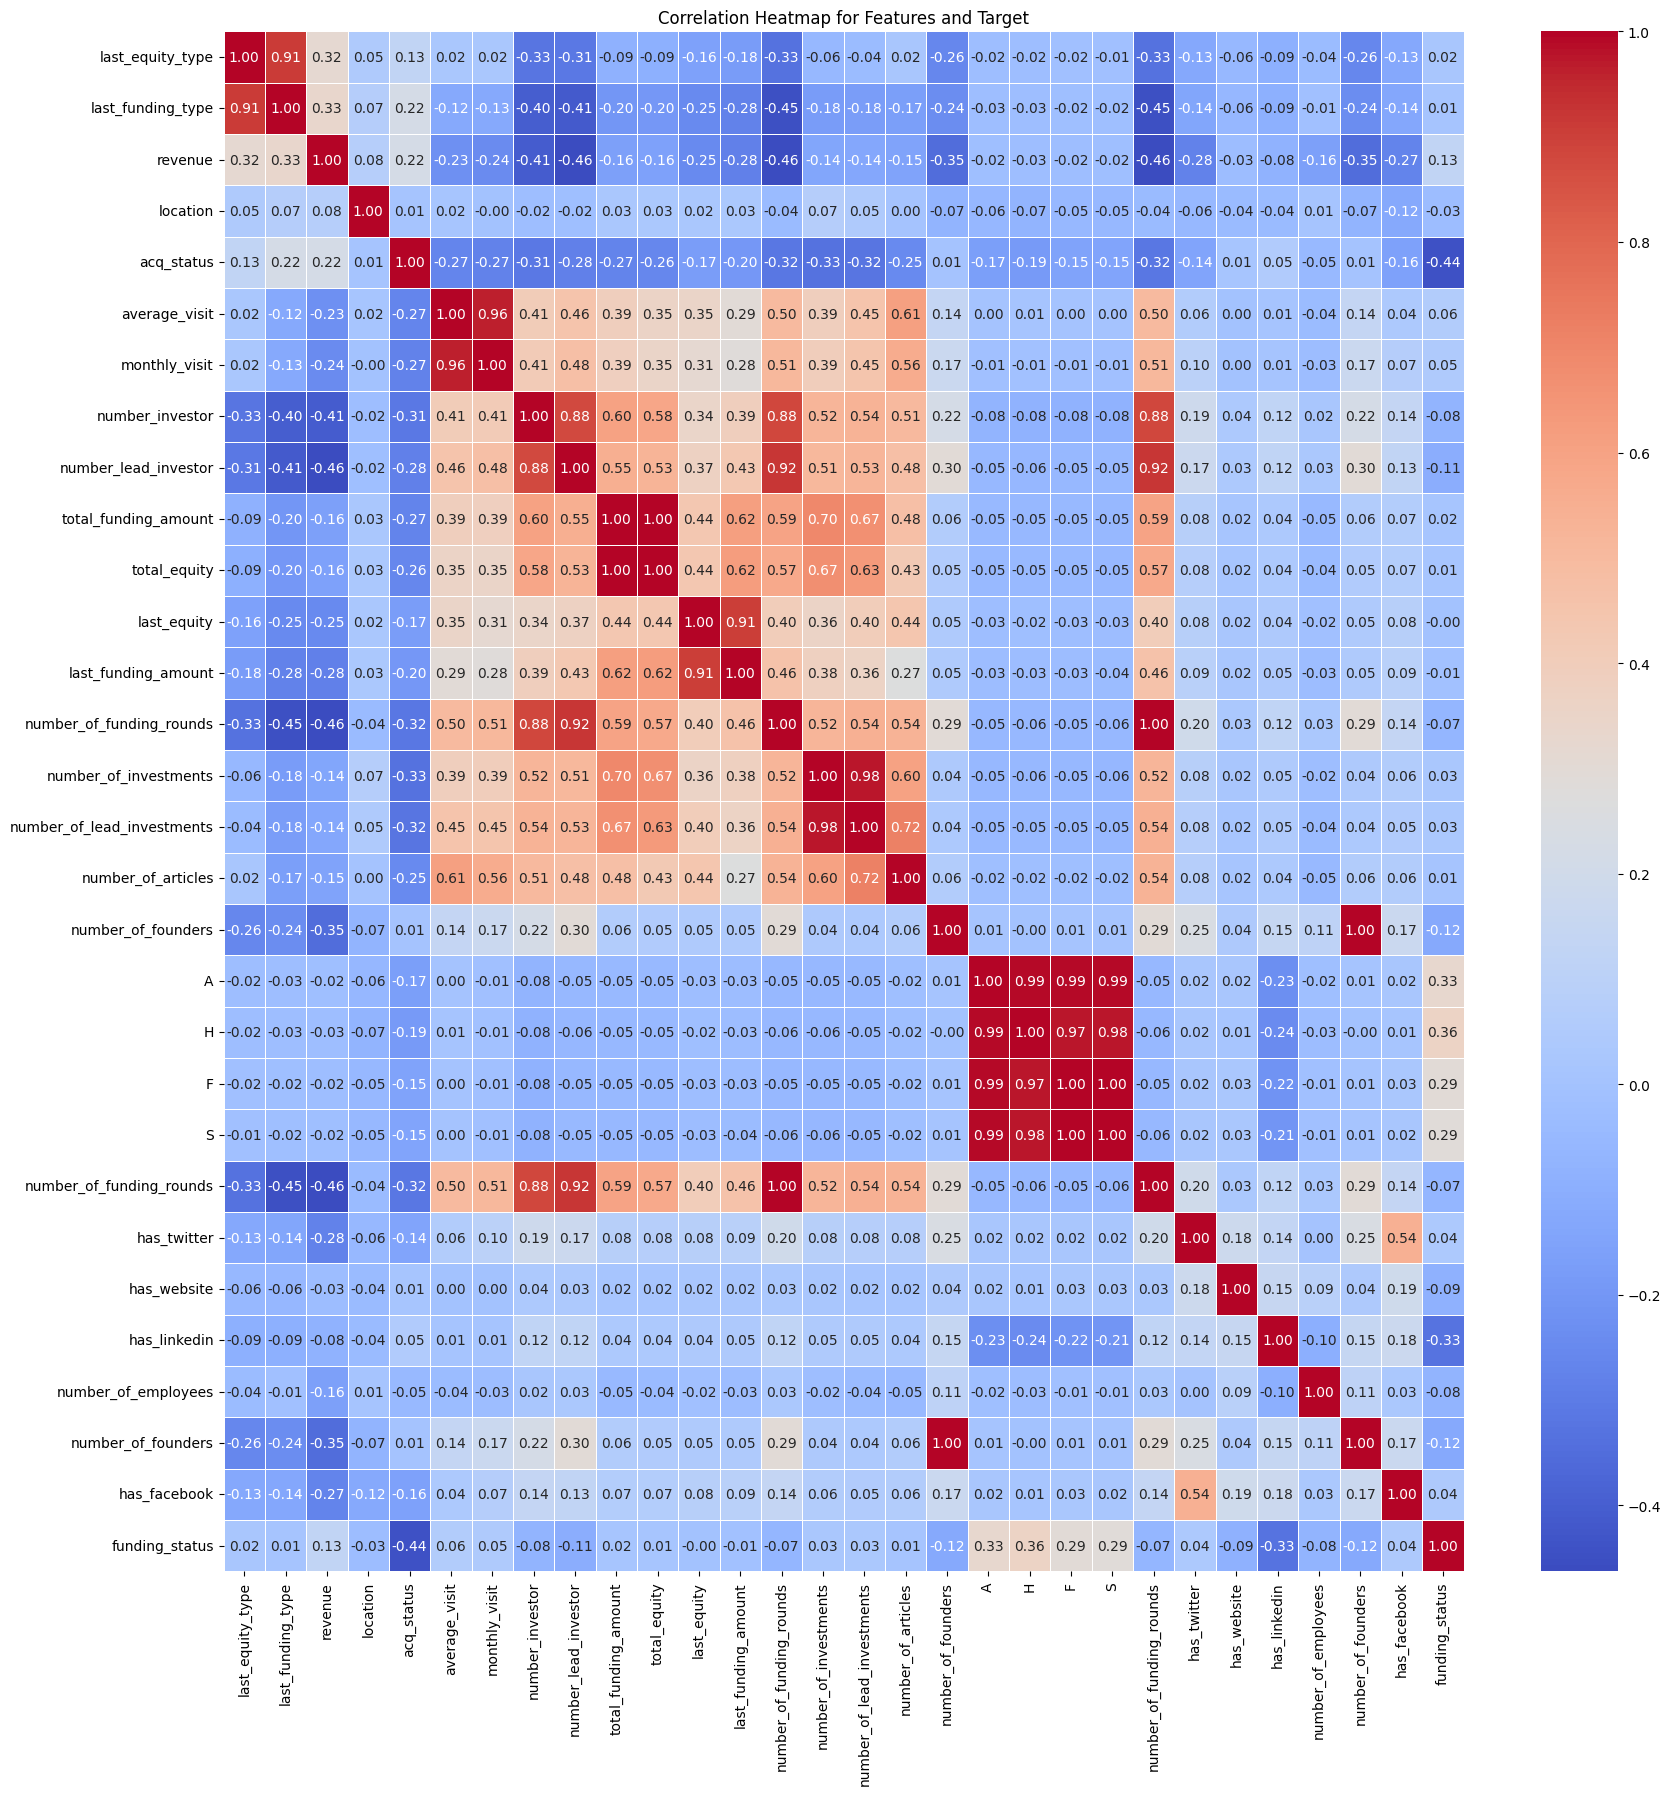

In [ ]:

# Extract features and target
features_and_target = company_data[['last_equity_type','last_funding_type','revenue','location','acq_status','average_visit','monthly_visit','number_investor','number_lead_investor','total_funding_amount','total_equity','last_equity','last_funding_amount','number_of_funding_rounds','number_of_investments','number_of_lead_investments','number_of_articles','number_of_founders','A', 'H','F','S','number_of_funding_rounds','has_twitter','has_website', 'has_linkedin','number_of_employees','number_of_founders','has_facebook', 'funding_status']]

# Exploratory Data Analysis (EDA) for Features and Target
# Display basic statistics of the features and target
print("Summary Statistics for Features and Target:")
print(features_and_target.describe())

# Display information about the features and target
print("\nFeatures and Target Information:")
print(features_and_target.info())

# Display the first few rows of the features and target
print("\nFirst Few Rows of Features and Target:")
print(features_and_target.head())

# Correlation Heatmap for Features and Target
# Calculate correlation matrix for features and target
correlation_matrix = features_and_target.corr()

# Plot the heatmap for features and target
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap for Features and Target")
plt.show()


         Feature 1       Feature 2  Correlation
0                A               A     1.000000
1                H               H     1.000000
2                S               S     1.000000
3                F               F     1.000000
4   funding_status  funding_status     1.000000
5                F               S     0.997049
6                S               F     0.997049
7                F               A     0.992964
8                A               F     0.992964
9                A               S     0.992047
10               S               A     0.992047
11               A               H     0.989306
12               H               A     0.989306
13               H               S     0.975225
14               S               H     0.975225
15               H               F     0.974014
16               F               H     0.974014
17               H  funding_status     0.361610
18  funding_status               H     0.361610
19  funding_status               A     0

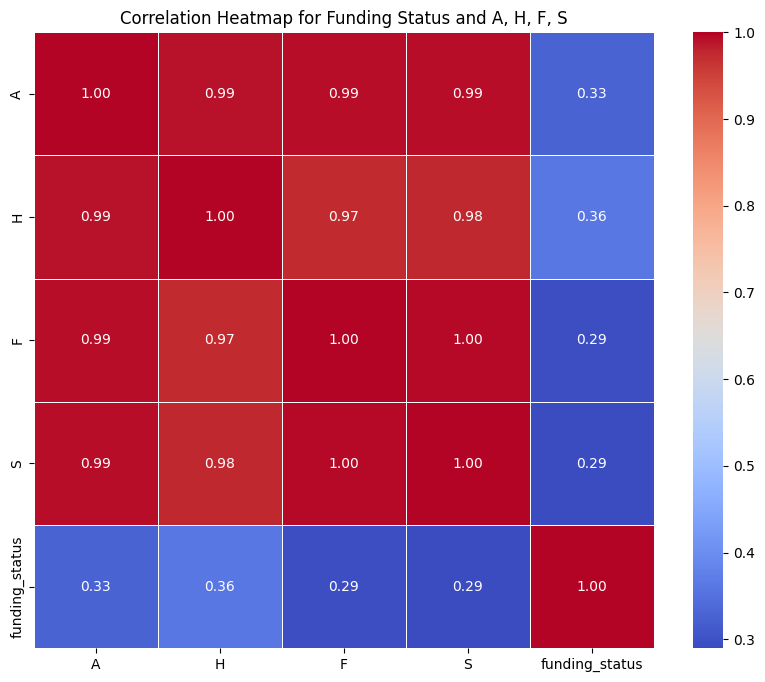

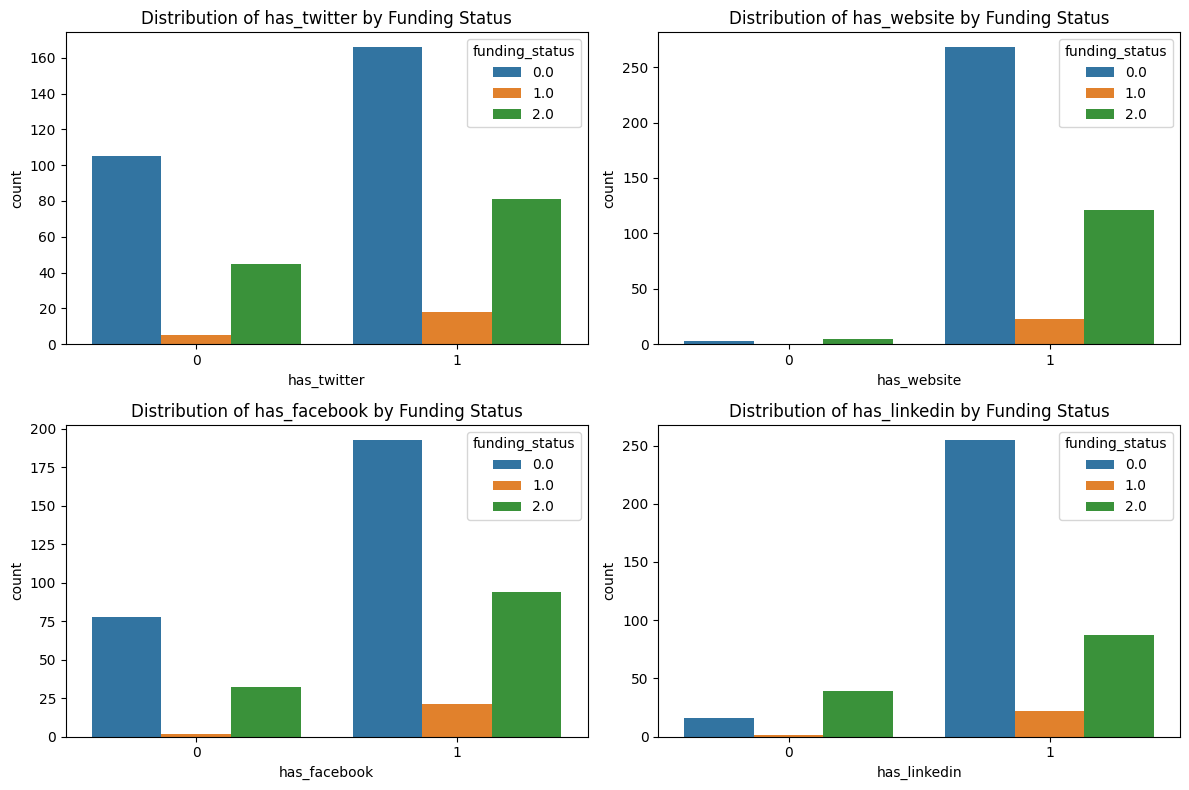

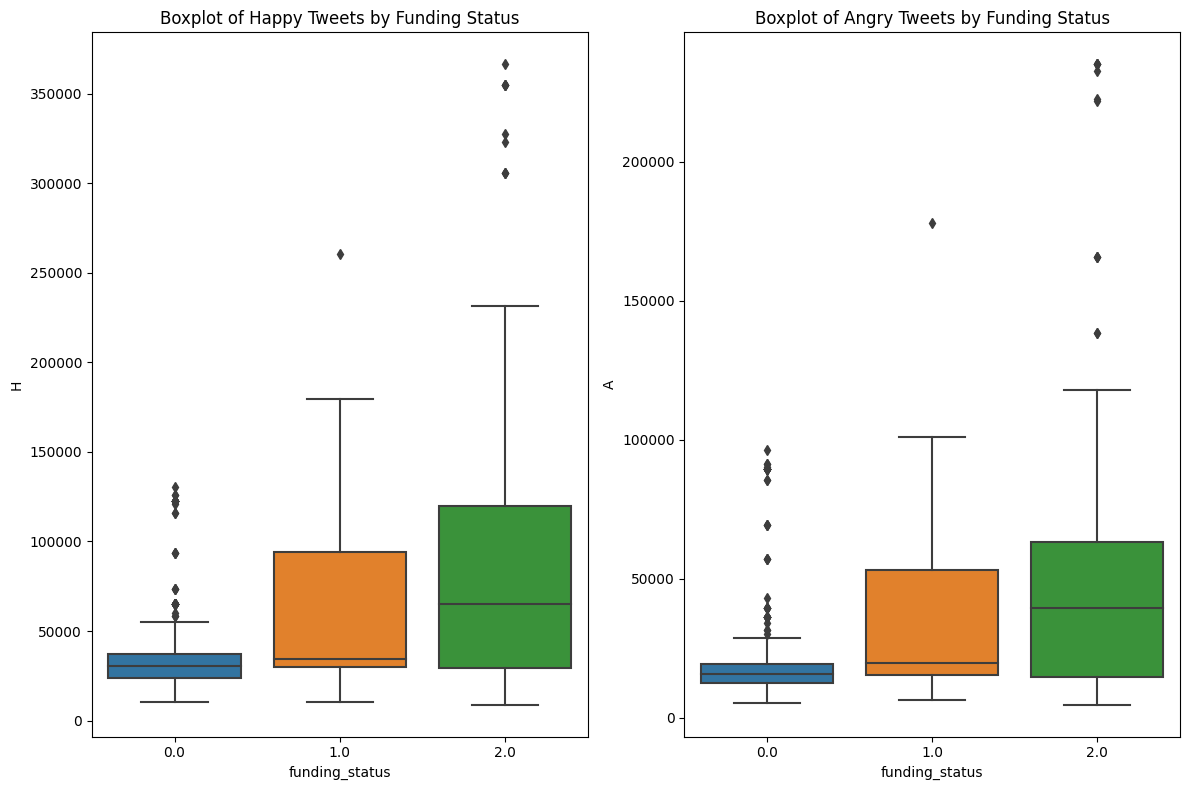

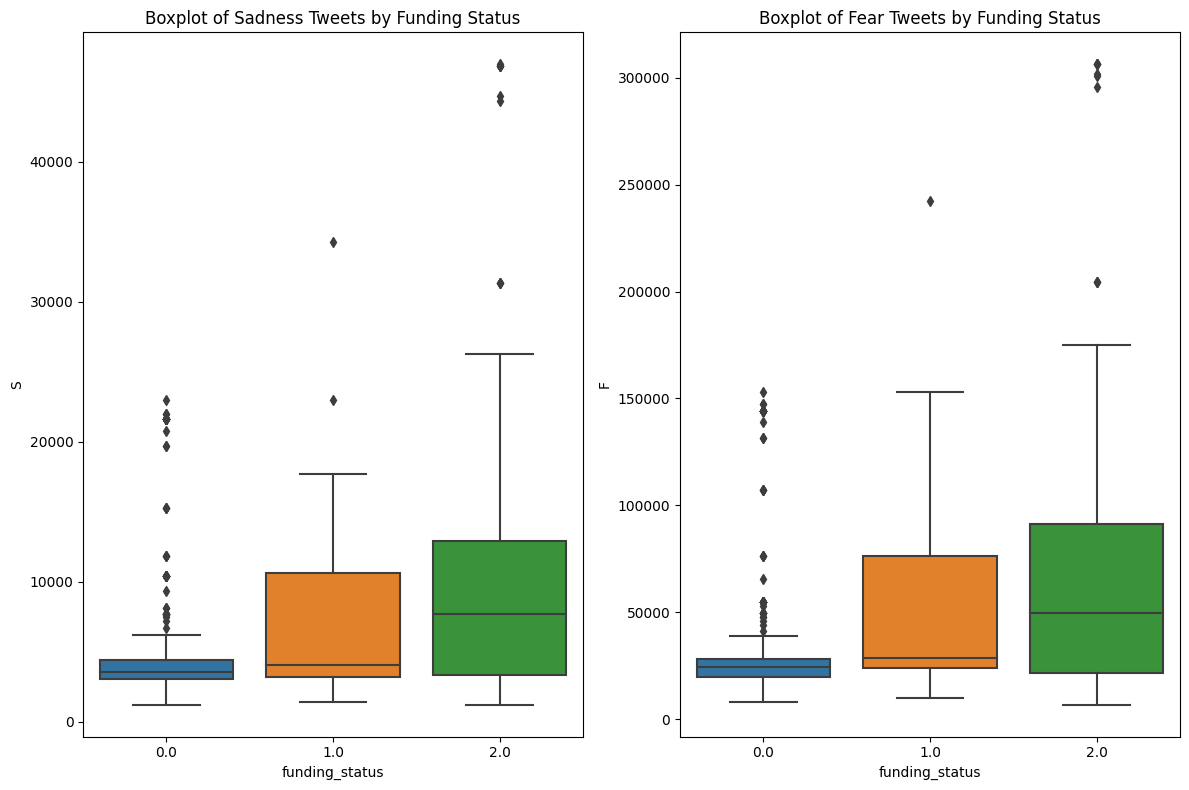

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Ensure NumPy is imported
# Select relevant columns
selected_columns = ['A', 'H', 'F', 'S', 'funding_status']
selected_data = company_data[selected_columns]

# Correlation Heatmap for Funding Status and A, H, F, S
correlation_matrix = selected_data.corr()
correlation_table = pd.DataFrame(correlation_matrix.unstack().sort_values(ascending=False),
                                  columns=['Correlation']).reset_index()

# Rename columns for clarity
correlation_table.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Export to CSV file
correlation_table.to_csv('correlation_table.csv', index=False)

# Display the correlation table
print(correlation_table)
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap for Funding Status and A, H, F, S")
plt.show()
# Select relevant columns
selected_columns = ['funding_status', 'has_twitter', 'has_website', 'has_facebook', 'has_linkedin']
selected_data = company_data[selected_columns]

# EDA - Bar Plots
plt.figure(figsize=(12, 8))

# Plot for 'has_twitter'
plt.subplot(2, 2, 1)
sns.countplot(x='has_twitter', hue='funding_status', data=selected_data)
plt.title('Distribution of has_twitter by Funding Status')

# Plot for 'has_website'
plt.subplot(2, 2, 2)
sns.countplot(x='has_website', hue='funding_status', data=selected_data)
plt.title('Distribution of has_website by Funding Status')

# Plot for 'has_facebook'
plt.subplot(2, 2, 3)
sns.countplot(x='has_facebook', hue='funding_status', data=selected_data)
plt.title('Distribution of has_facebook by Funding Status')

# Plot for 'has_linkedin'
plt.subplot(2, 2, 4)
sns.countplot(x='has_linkedin', hue='funding_status', data=selected_data)
plt.title('Distribution of has_linkedin by Funding Status')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('eda_funding_status_social_media.png')
plt.show()
# Select relevant columns
selected_columns = ['funding_status', 'S', 'F', 'A', 'H']
selected_data = company_data[selected_columns]

# EDA - Bar Plots
plt.figure(figsize=(12, 8))

# Boxplot for 'number_of_happy_tweet'
plt.subplot(1, 2, 1)
sns.boxplot(x='funding_status', y='H', data=selected_data)
plt.title('Boxplot of Happy Tweets by Funding Status')

# Boxplot for 'number_of_angry_tweet'
plt.subplot(1, 2, 2)
sns.boxplot(x='funding_status', y='A', data=selected_data)
plt.title('Boxplot of Angry Tweets by Funding Status')
# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('eda_funding_status_tweets.png')
plt.show()
plt.figure(figsize=(12, 8))
# Boxplot for 'number_of_happy_tweet'
plt.subplot(1, 2, 1)
sns.boxplot(x='funding_status', y='S', data=selected_data)
plt.title('Boxplot of Sadness Tweets by Funding Status')

# Boxplot for 'number_of_angry_tweet'
plt.subplot(1, 2, 2)
sns.boxplot(x='funding_status', y='F', data=selected_data)
plt.title('Boxplot of Fear Tweets by Funding Status')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('eda_funding_status_tweets.png')
plt.show()


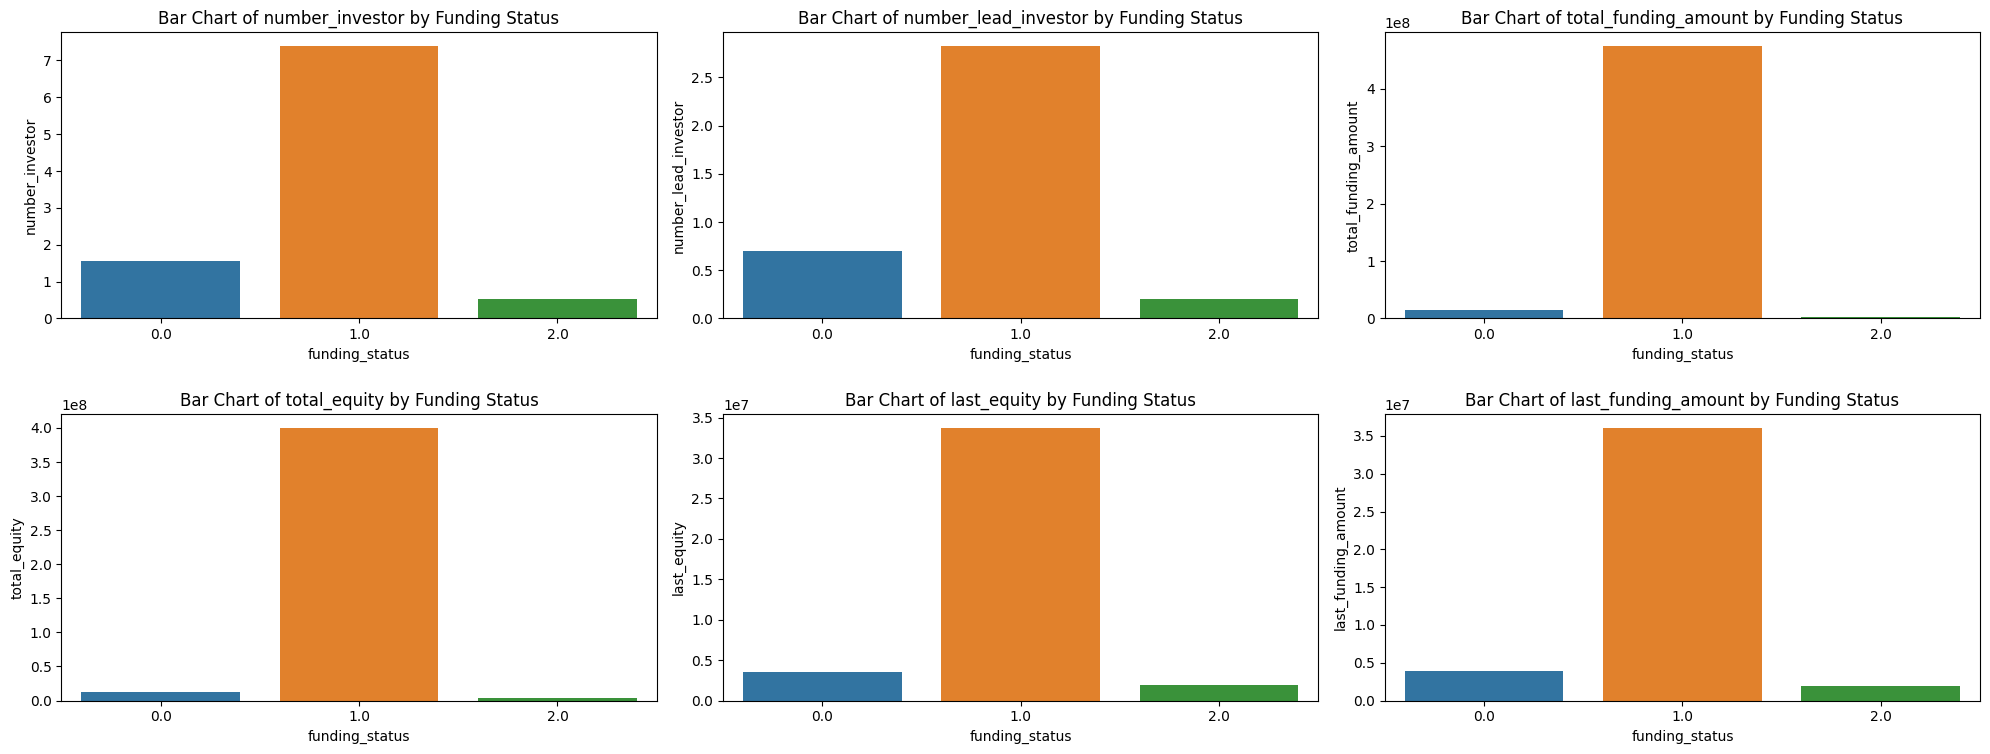

In [ ]:
# Select relevant columns
selected_columns = ['funding_status', 'number_investor', 'number_lead_investor', 'total_funding_amount', 'total_equity', 'last_equity', 'last_funding_amount']
selected_data = company_data[selected_columns]
# EDA - Bar Charts
plt.figure(figsize=(20, 15))

# Loop through each feature for EDA
for i, feature in enumerate(selected_columns[1:]):
    plt.subplot(4, 3, i+1)

    # Check if the feature is numeric or categorical
    if company_data[feature].dtype == 'O':
        sns.countplot(x=feature, hue='funding_status', data=selected_data)
        plt.title(f'Distribution of {feature} by Funding Status')
    else:
        sns.barplot(x='funding_status', y=feature, data=selected_data, errorbar=None)
        plt.title(f'Bar Chart of {feature} by Funding Status')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('eda_funding_status_features_bar.png')
plt.show()

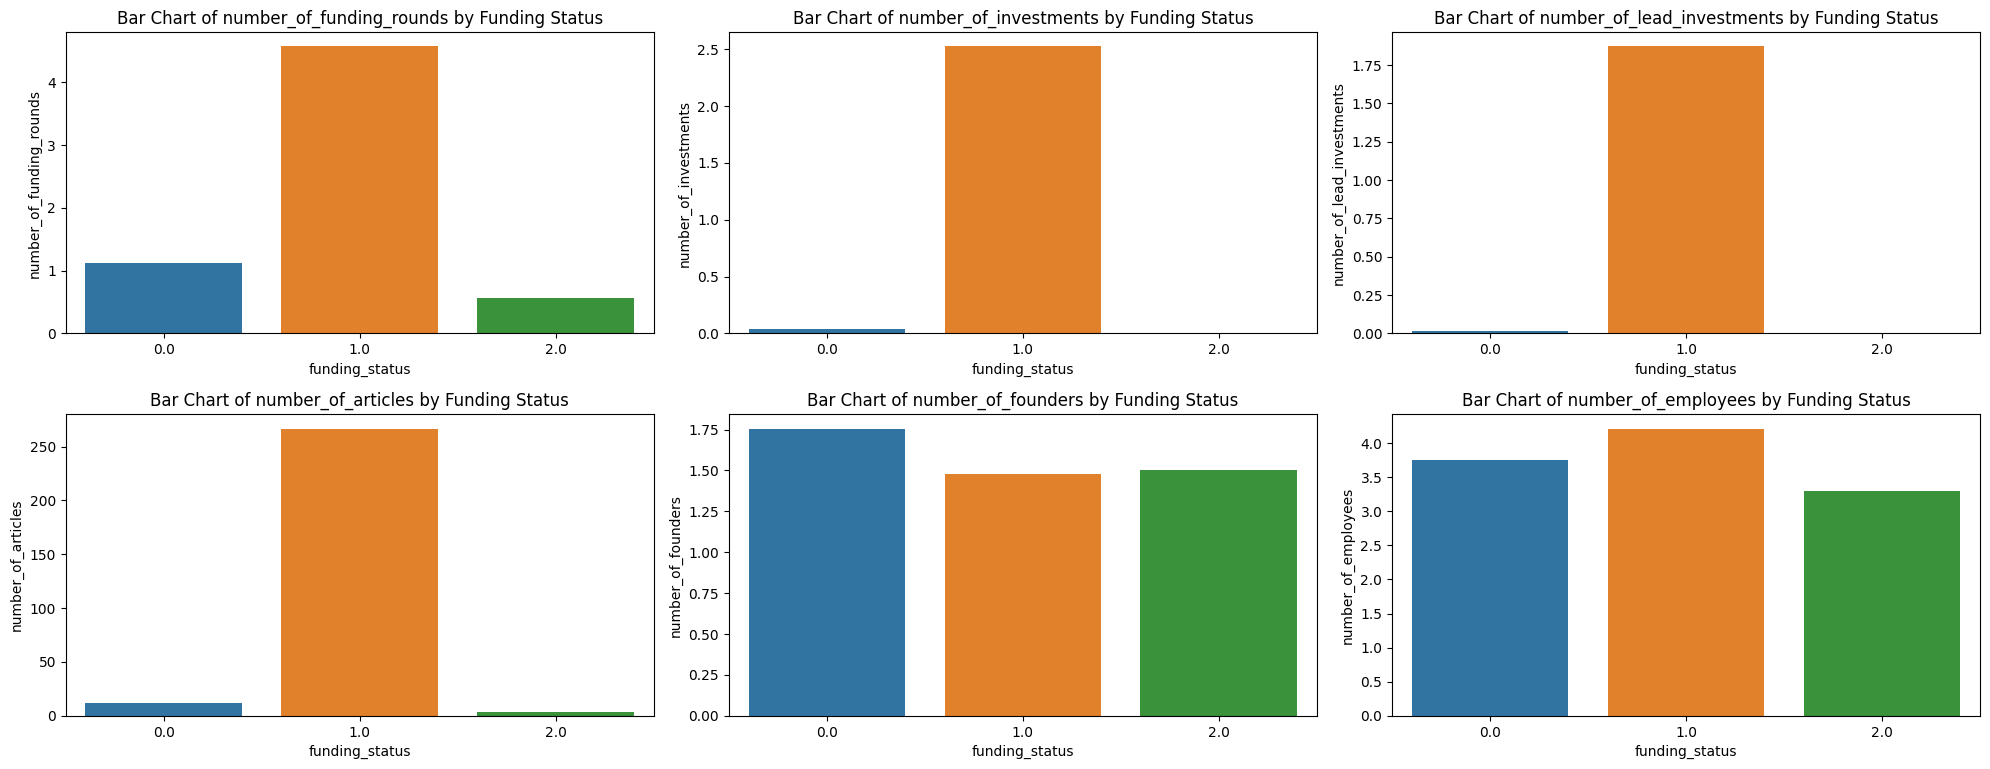

In [ ]:
# Select relevant columns
selected_columns = ['funding_status', 'number_of_funding_rounds', 'number_of_investments', 'number_of_lead_investments', 'number_of_articles', 'number_of_founders', 'number_of_employees']
selected_data = company_data[selected_columns]
# EDA - Bar Charts
plt.figure(figsize=(20, 15))

# Loop through each feature for EDA
for i, feature in enumerate(selected_columns[1:]):
    plt.subplot(4, 3, i+1)

    # Check if the feature is numeric or categorical
    if company_data[feature].dtype == 'O':
        sns.countplot(x=feature, hue='funding_status', data=selected_data)
        plt.title(f'Distribution of {feature} by Funding Status')
    else:
        sns.barplot(x='funding_status', y=feature, data=selected_data, errorbar=None)
        plt.title(f'Bar Chart of {feature} by Funding Status')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('eda_funding_status_features_bar.png')
plt.show()

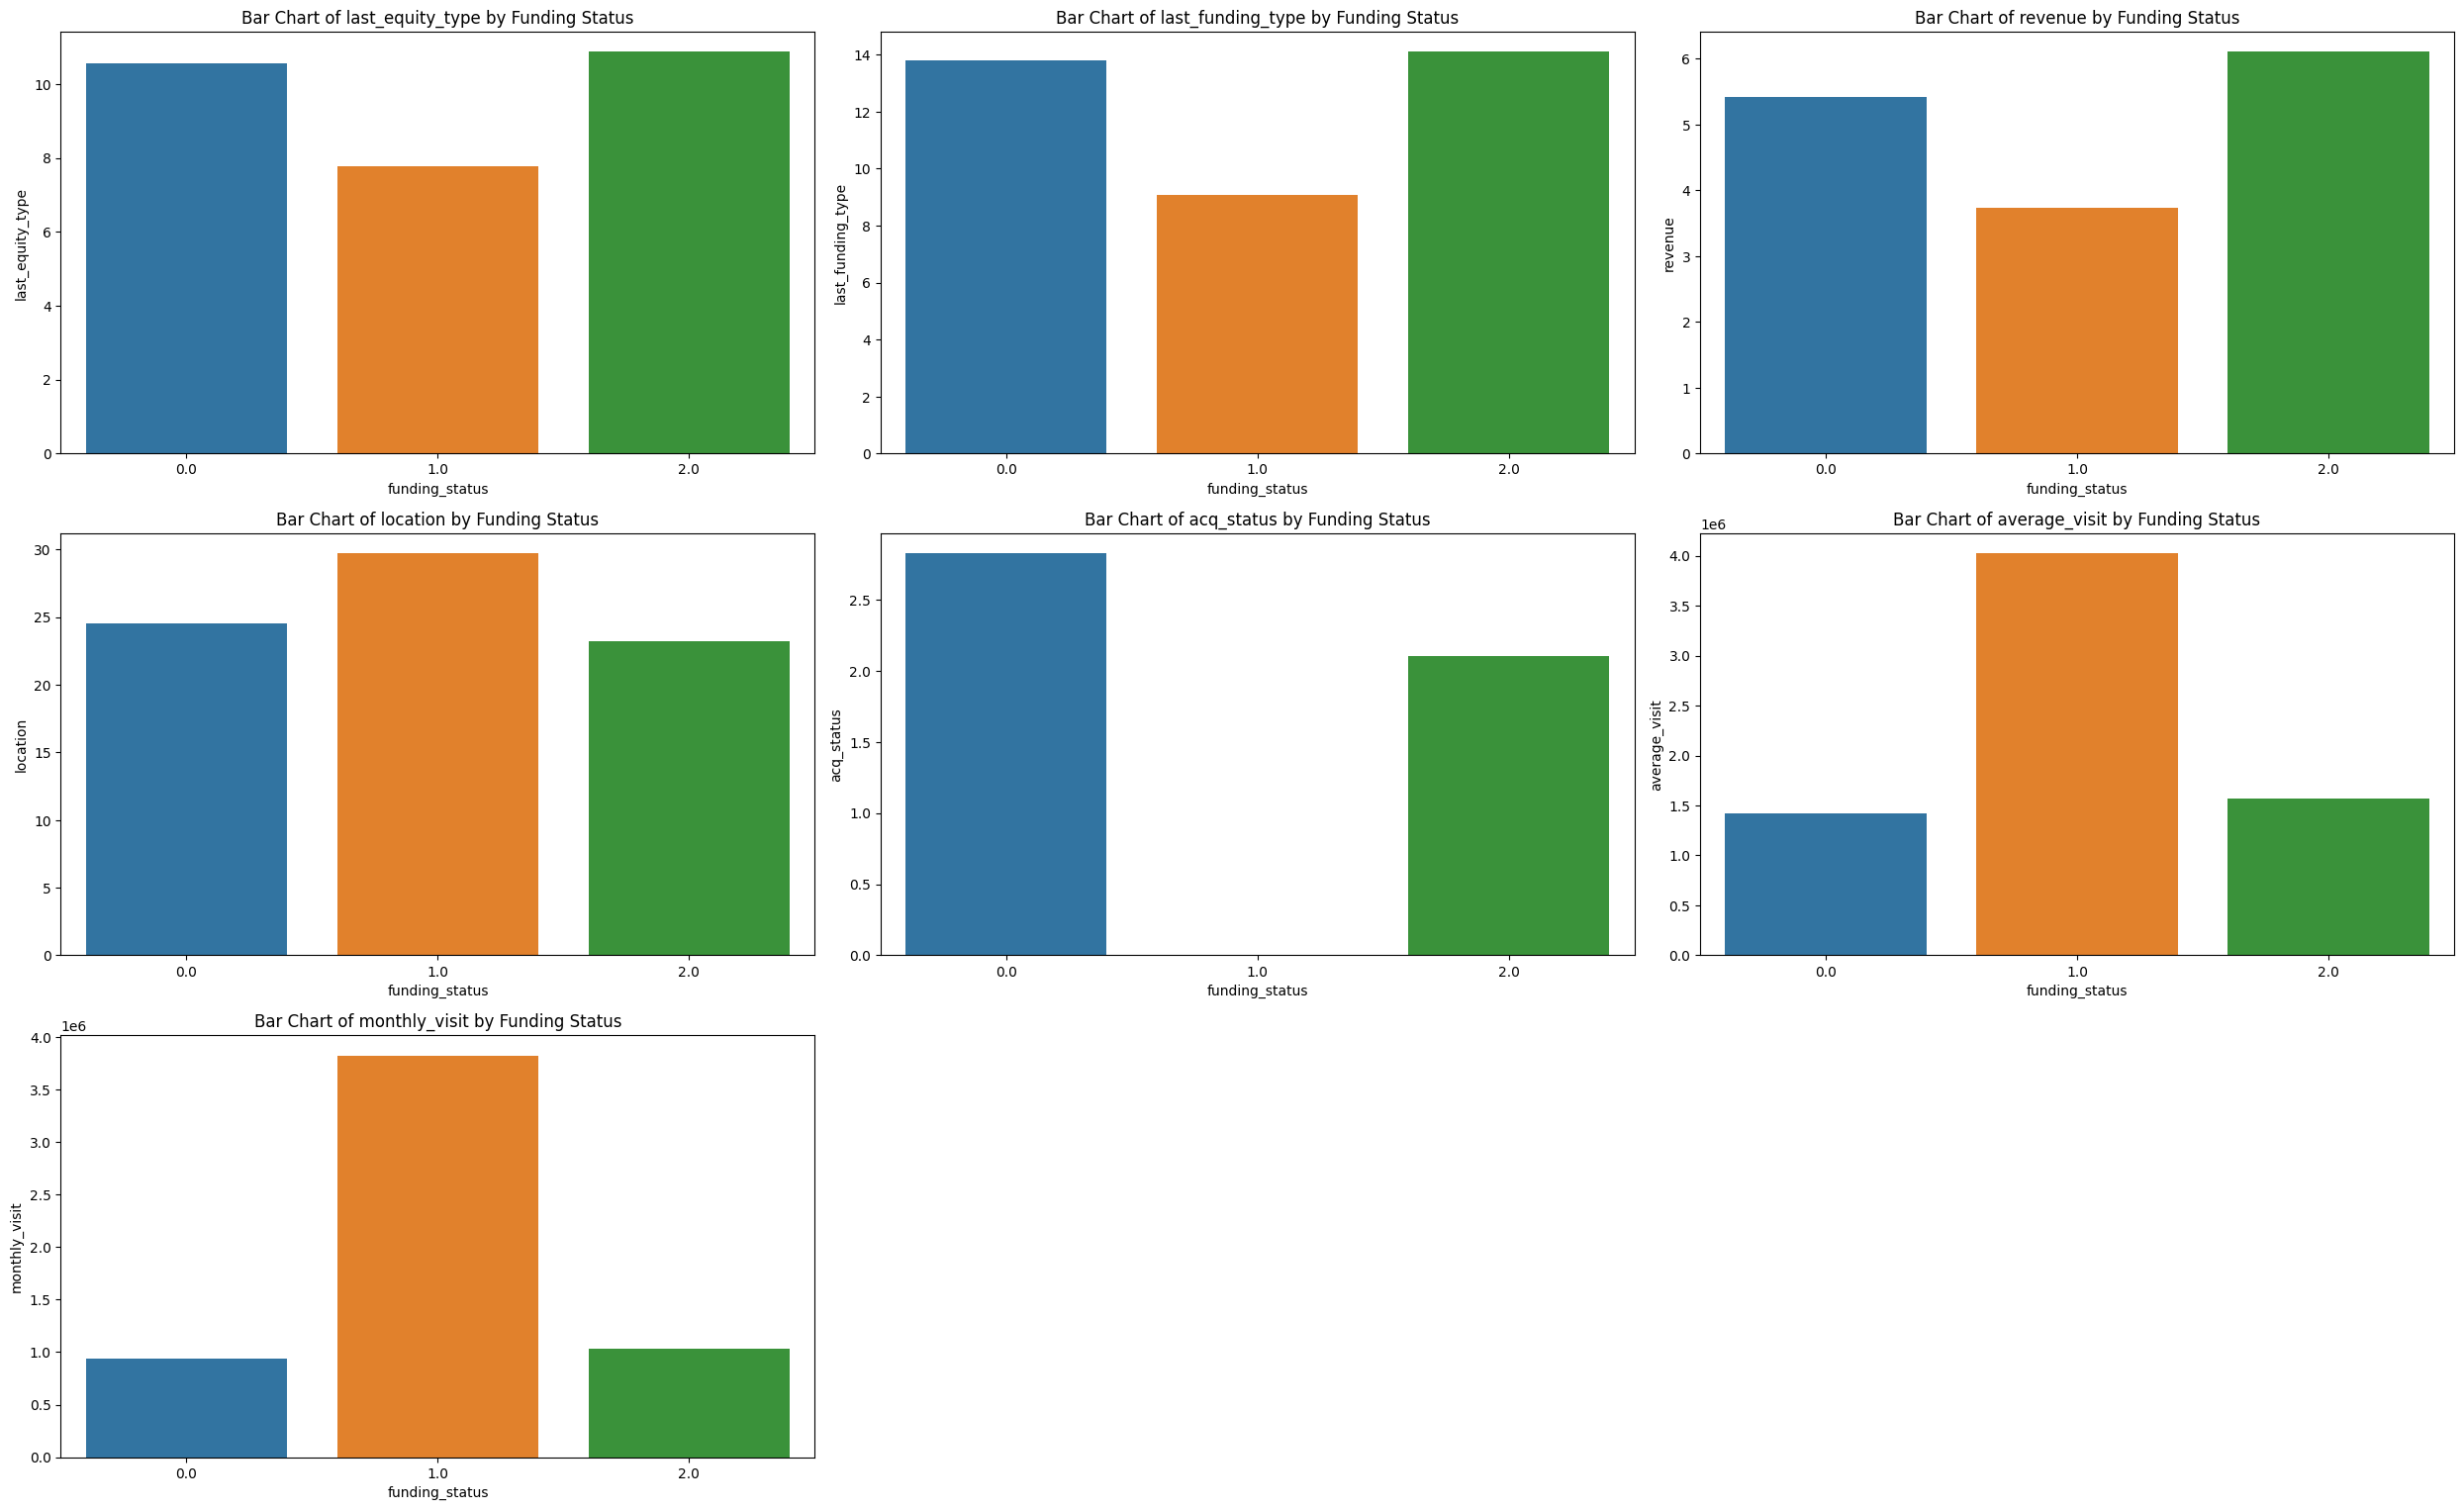

In [ ]:
# Select relevant columns
selected_columns = ['funding_status', 'last_equity_type', 'last_funding_type', 'revenue', 'location', 'acq_status', 'average_visit', 'monthly_visit']
selected_data = company_data[selected_columns]
# EDA - Bar Charts
plt.figure(figsize=(25, 20))

# Loop through each feature for EDA
for i, feature in enumerate(selected_columns[1:]):
    plt.subplot(4, 3, i+1)

    # Check if the feature is numeric or categorical
    if company_data[feature].dtype == 'O':
        sns.countplot(x=feature, hue='funding_status', data=selected_data)
        plt.title(f'Distribution of {feature} by Funding Status')
    else:
        sns.barplot(x='funding_status', y=feature, data=selected_data, errorbar=None)
        plt.title(f'Bar Chart of {feature} by Funding Status')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('eda_funding_status_features_bar.png')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset from company.cs


X = company_data[['last_equity_type','last_funding_type','revenue','location','acq_status','average_visit','monthly_visit','number_investor','number_lead_investor','total_funding_amount','total_equity','last_equity','last_funding_amount','number_of_funding_rounds','number_of_investments','number_of_lead_investments','number_of_articles','number_of_founders','A', 'H','F','S','number_of_funding_rounds','has_twitter','has_website', 'has_linkedin','number_of_employees','number_of_founders','has_facebook']]
y = company_data['funding_status']

#target = label_encoder_funding.fit_transform(company_data['funding_status'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement a custom dataset class
class CompanyDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        X = self.features.iloc[idx].values
        y = self.targets.iloc[idx]
        return X, y

# Create the train and test datasets
train_dataset = CompanyDataset(X_train, y_train)
test_dataset = CompanyDataset(X_test, y_test)

# Create dataloaders for batch processing
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8)

# Define the Swin Transformer model
class SwinTransformer(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SwinTransformer, self).__init__()
        self.fc = nn.Linear(input_dim, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = self.fc(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# Set device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the model and move it to the device
model = SwinTransformer(input_dim=features.shape[1], output_dim=1)
model.to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    train_loss = 0

    for batch_features, batch_labels in train_dataloader:
        batch_features = batch_features.float().to(device)
        batch_labels = batch_labels.float().to(device)

        optimizer.zero_grad()

        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels.unsqueeze(1))
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, train_loss / len(train_dataloader)))

# Evaluation loop
model.eval()
test_loss = 0

with torch.no_grad():
    for batch_features, batch_labels in test_dataloader:
        batch_features = batch_features.float().to(device)
        batch_labels = batch_labels.float().to(device)

        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels.unsqueeze(1))

        test_loss += loss.item()

print('Test Loss: {:.4f}'.format(test_loss / len(test_dataloader)))
# Conversion to PyTorch tensors
X_train_torch = torch.tensor(X_train.values, dtype=torch.float32)
X_test_torch = torch.tensor(X_test.values, dtype=torch.float32)

y_train_torch = torch.tensor(y_train.values, dtype=torch.long)
y_test_torch = torch.tensor(y_test.values, dtype=torch.long)
# Step 4: Make predictions and calculate accuracy
model.eval()
with torch.no_grad():
    predictions_train = np.argmax(model(X_train_torch).numpy(), axis=1)
    predictions_test = np.argmax(model(X_test_torch).numpy(), axis=1)

train_accuracy = accuracy_score(y_train, predictions_train)
test_accuracy = accuracy_score(y_test, predictions_test)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch [1/20], Loss: 5331165160050.2861
Epoch [2/20], Loss: 48268013576905.1406
Epoch [3/20], Loss: 95407873944182.8594
Epoch [4/20], Loss: 5168541105995.0479
Epoch [5/20], Loss: 29546202504928.7617
Epoch [6/20], Loss: 6429358359842.2861
Epoch [7/20], Loss: 5806903645110.8574
Epoch [8/20], Loss: 12313049150018.8574
Epoch [9/20], Loss: 30046664436200.3828
Epoch [10/20], Loss: 43025654169897.1406
Epoch [11/20], Loss: 40823434458153.9062
Epoch [12/20], Loss: 42528314820933.3359
Epoch [13/20], Loss: 9871836760816.7617
Epoch [14/20], Loss: 3731124184649.9048
Epoch [15/20], Loss: 22267925886312.3828
Epoch [16/20], Loss: 30808911139276.1914
Epoch [17/20], Loss: 14594184587976.6660
Epoch [18/20], Loss: 3213760873508.3809
Epoch [19/20], Loss: 8672775848656.0000
Epoch [20/20], Loss: 17026573727516.3809
Test Loss: 9818095808597.8184
Train Accuracy: 0.6458
Test Accuracy: 0.6429
